# My playing with the Kaggle titanic challenge.

I got lots of the ideas for this first Kaggle advanture from [here](https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic/comments)

In [1]:
import pandas as pd 
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

train_df = pd.read_csv("train.csv",dtype={"Age":np.float64},)

In [2]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# find how many ages
train_df['Age'].count()

714

In [4]:
# how many ages are NaN?
train_df['Age'].isnull().sum()

177

Mean age =  29.6792717087


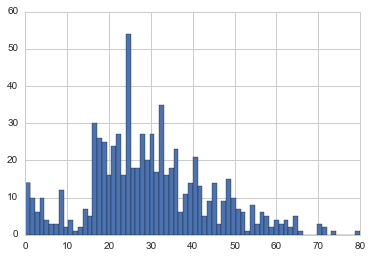

In [5]:
# plot ages of training data set, with NaN's removed
train_df['Age'].dropna().astype(int).hist(bins=70)
print 'Mean age = ',train_df['Age'].dropna().astype(int).mean()

# Let's see where they got on

In [6]:
train_df['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
train_df['Embarked'].isnull().sum()

2

In [9]:
train_df["Embarked"].count()

889

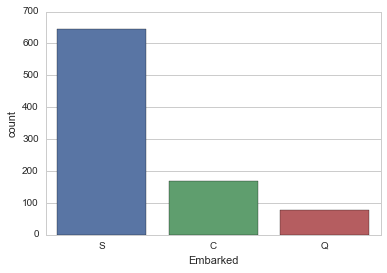

In [10]:
sns.countplot(x="Embarked",data=train_df)

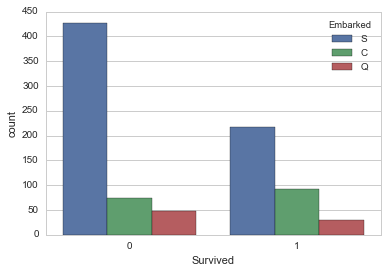

In [11]:
sns.countplot(x='Survived',hue='Embarked',data=train_df,order=[0,1])

## OK, so clearly there were more people who got on at S, and it seems their survival is disproportional.  Let's check that.

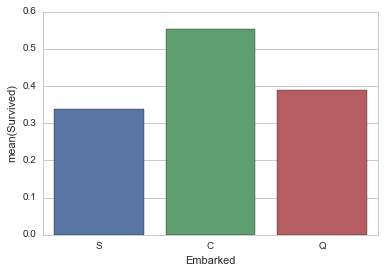

In [12]:
embark_survive_perc = train_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_survive_perc,order=['S','C','Q'])

## Interesting, actually those from C had higher rate of survival.  So, knowing more people from your home town didn't help.

## Next, did how much they paid have an effect?

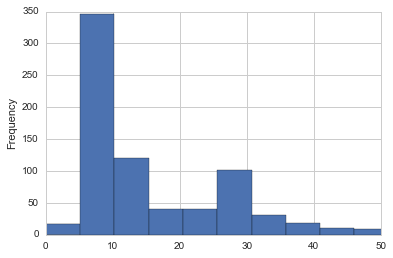

In [13]:
train_df['Fare'].astype(int).plot(kind='hist',bins=100, xlim=(0,50))

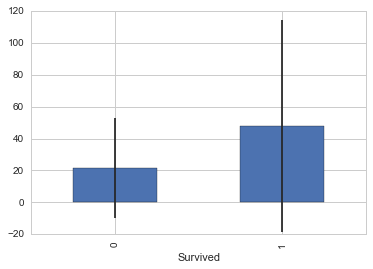

In [14]:
# get fare for survived & didn't survive passengers 
fare_not_survived = train_df["Fare"].astype(int)[train_df["Survived"] == 0]
fare_survived     = train_df["Fare"].astype(int)[train_df["Survived"] == 1]

# get average and std for fare of survived/not survived passengers
avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_not_survived.std(), fare_survived.std()])

avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

## Before digging into how the ages factor in, let's take the advice of others and replace NaN's with random values

In [15]:
import scipy.stats as stats

# column 'Age' has some NaN values
# A simple approximation of the distribution of ages is a gaussian, but this is not commonly accurate.
# lets make a vector of random ages centered on the mean, with a width of the std
lower, upper = train_df['Age'].min(), train_df['Age'].max()
mu, sigma = train_df["Age"].mean(), train_df["Age"].std()

# number of rows
n = train_df.shape[0]

print 'max: ',train_df['Age'].max()
print 'min: ',train_df['Age'].min()

# vector of random values using the truncated normal distribution.  
X = stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
rands = X.rvs(n)

# get the indexes of the elements in the original array that are NaN
idx = np.isfinite(train_df['Age'])

# use the indexes to replace the NON-NaNs in the random array with the good values from the original array
rands[idx.values] = train_df[idx]['Age'].values

## At this point rands is now the cleaned column of data we wanted, so push it in to the original df
train_df['Age'] = rands

"""
## we will make a new column with Nan's replaced, then push that into the original df
n = train_df.shape[0] # number of rows
#randy = np.random.randint(average_age_train - std_age_train, average_age_train + std_age_train, size = n)
# draw from a gaussian instead of simple uniform
# note this uses a 'standard gauss' and that tneeds to have its var and mean shifted
randy = np.random.randn(n)*std_age_train + average_age_train
idx = np.isfinite(train_df['Age']) # gives a boolean index for the NaNs in the df's column
randy[idx.values] = train_df[idx]['Age'].values  ## idexing the values of randy with this
#now have updated column, next push into original df
train_df['Age'] = randy
"""

print 'After this gaussian replacment, there are: ',train_df['Age'].isnull().sum()

print 'max: ',train_df['Age'].max()
print 'min: ',train_df['Age'].min()

max:  80.0
min:  0.42
After this gaussian replacment, there are:  0
max:  80.0
min:  0.42


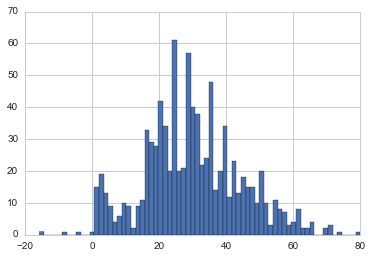

In [16]:
# plot new Age Values
train_df['Age'].hist(bins=70)
# Compare this to that from a few cells up for the raw ages with the NaN's dropped.  Not much different actually.

### lets perform the same NaN replacement for the 'Age' with the test data as well

In [17]:
## let's pull in the test data
test_df = pd.read_csv("test.csv",dtype={"Age":np.float64},)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:

print 'Before any NaN replacment, there are: ',test_df['Age'].isnull().sum()

# column 'Age' has some NaN values
# A simple approximation of the distribution of ages is a gaussian, but this is not commonly accurate.
# lets make a vector of random ages centered on the mean, with a width of the std
mn = test_df["Age"].mean()
st = test_df["Age"].std()

# number of rows
n = test_df.shape[0]

# vector of random values using the 'standard normal'.  ie. centered on 0, with variance = 1.0
rands = np.random.randn(n)
# change to centered on mean and with width equal to std
rands = rands*st + mn #above two steps could be combined

# get the indexes of the elements in the original array that are NaN
idx = np.isfinite(test_df['Age'])

# use the indexes to replace the NON-NaNs in the random array with the good values from the original array
rands[idx.values] = test_df[idx]['Age'].values

## At this point rands is now the cleaned column of data we wanted, so push it in to the original df
test_df['Age'] = rands

print 'After this gaussian replacment, there are: ',test_df['Age'].isnull().sum()

Before any NaN replacment, there are:  86
After this gaussian replacment, there are:  0


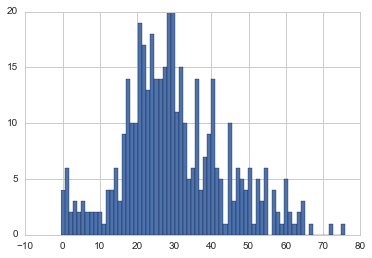

In [19]:
test_df['Age'].hist(bins=70)

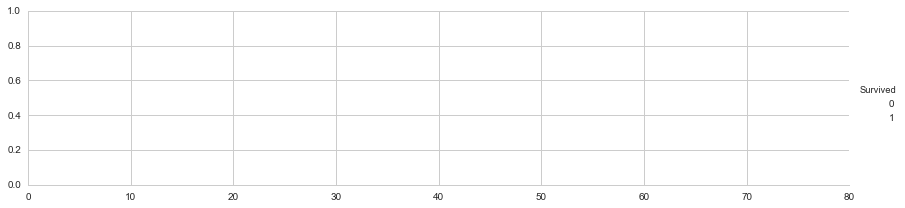

In [20]:
## Let's make a couple nice plots of survival vs age
# peaks for survived/not survived passengers by their age

facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
#facet.map(sns.kdeplot,'Age',shade= True) # This keeps crashing the kernal, but I don't know why!!!!!!!!!!
facet.set(xlim=(0, train_df['Age'].astype(int).max()))
facet.add_legend()


max:  80
min:  -15


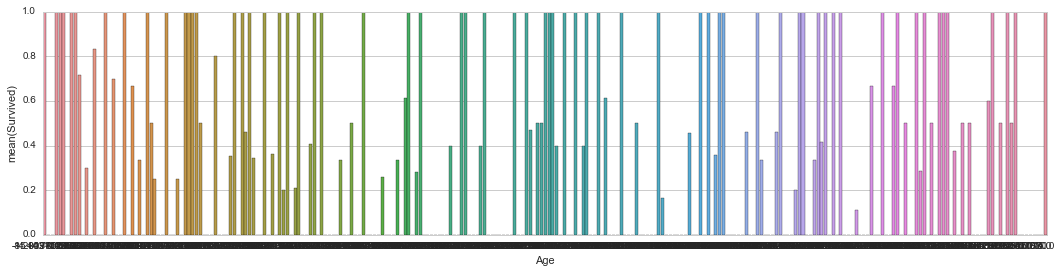

In [22]:
# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)
print 'max: ',train_df['Age'].astype(int).max()
print 'min: ',train_df['Age'].astype(int).min()